In [ ]:
from visanalysis.analysis import manalysis_ID
from visanalysis.analysis import mz_analysis as sta
# from visanalysis.analysis import shared_analysis as sta

import matplotlib.pyplot as plt

import numpy as np

In [ ]:
import importlib
importlib.reload(sta)
importlib.reload(manalysis_ID)

<module 'visanalysis.analysis.imaging_data' from '/Users/manzezhang/Documents/Stanford/Lab_Code/bruker_code/visanalysis/visanalysis/analysis/imaging_data.py'>

In [ ]:
experiment_file_path = r'/Users/manzezhang/Documents/Stanford/Lab_Code/bruker_sr_data/2025-11-04.hdf5'
series_number = 9

ID = manalysis_ID.ImagingDataObject(experiment_file_path, series_number)

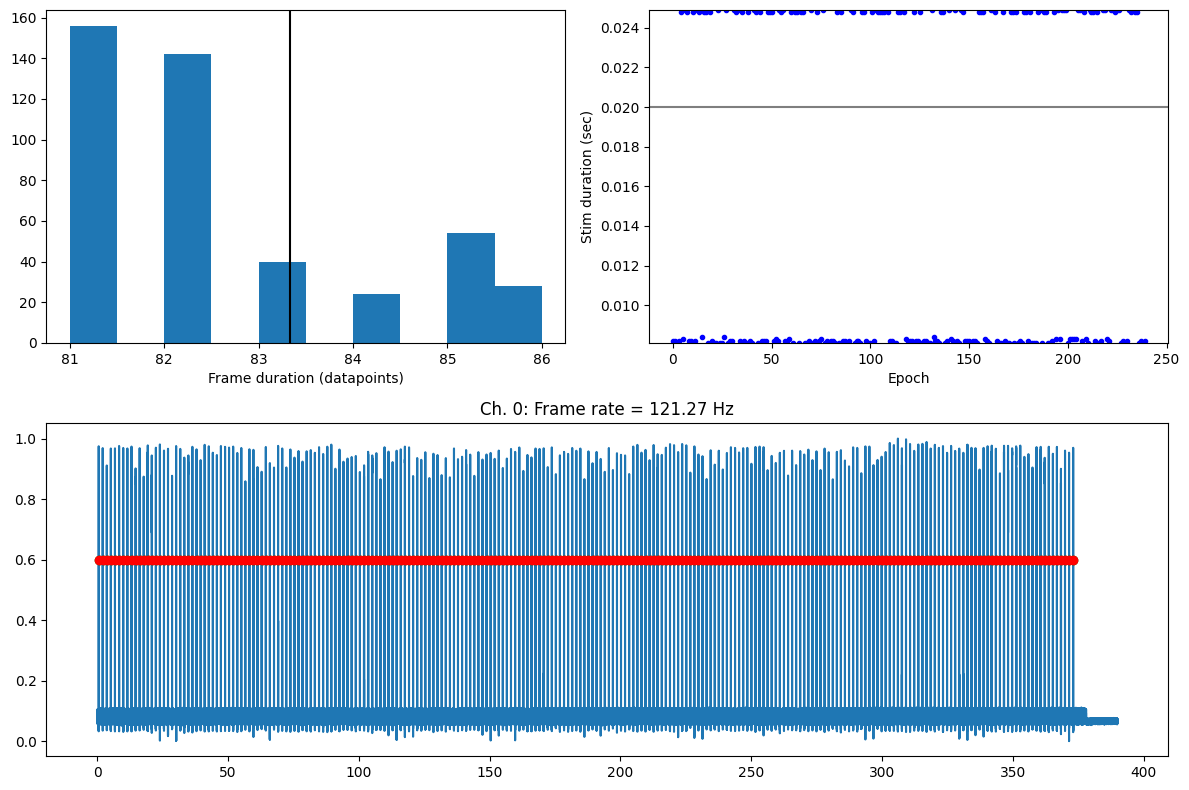

===================TIMING: Channel 0======================
240 Stims presented (of 240 parameterized)
Stim start to start: [min=1.533, median=1.550, max=1.592] / parameterized = 1.520 sec
Stim duration: [min=0.008, median=0.008, max=0.025] / parameterized = 0.020 sec
Dropped 0 / 684 frames (0.00%)


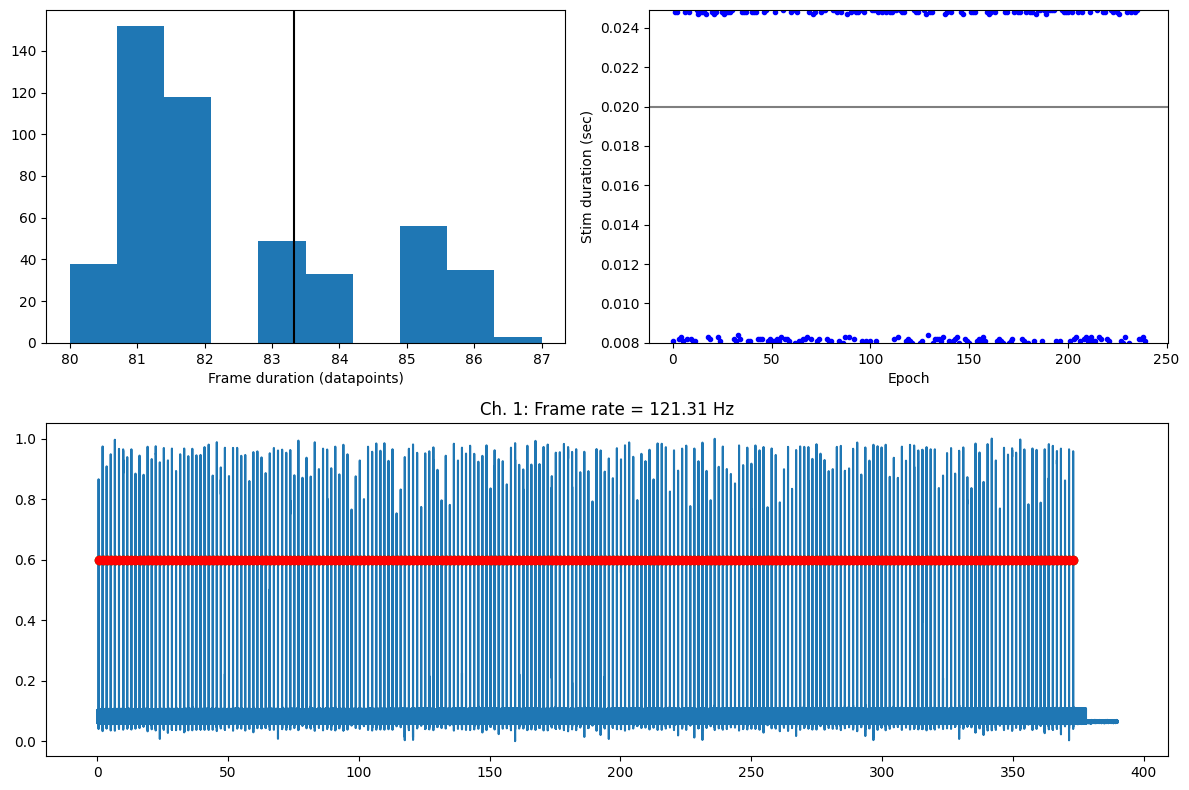

===================TIMING: Channel 1======================
240 Stims presented (of 240 parameterized)
Stim start to start: [min=1.533, median=1.550, max=1.592] / parameterized = 1.520 sec
Stim duration: [min=0.008, median=0.025, max=0.025] / parameterized = 0.020 sec
Dropped 0 / 724 frames (0.00%)


{'stimulus_end_times': array([  0.5641,   2.0975,   3.6476,   5.2061,   6.7979,   8.3648,
          9.9649,  11.5317,  13.1069,  14.6653,  16.2321,  17.7656,
         19.3241,  20.8742,  22.4244,  23.9579,  25.5246,  27.0747,
         28.6082,  30.1833,  31.7419,  33.2919,  34.8421,  36.4006,
         37.959 ,  39.5258,  41.0761,  42.6512,  44.1929,  45.7431,
         47.2932,  48.8684,  50.4185,  51.9687,  53.5438,  55.1022,
         56.6274,  58.1775,  59.736 ,  61.2695,  62.8529,  64.4532,
         66.0199,  67.5867,  69.1535,  70.7287,  72.2955,  73.8456,
         75.4041,  76.9542,  78.5043,  80.0545,  81.638 ,  83.2048,
         84.805 ,  86.3717,  87.9636,  89.497 ,  91.0471,  92.5974,
         94.1557,  95.6892,  97.2727,  98.8562, 100.4146, 102.0148,
        103.5733, 105.1484, 106.7152, 108.2737, 109.8322, 111.3656,
        112.9158, 114.4742, 116.0494, 117.6163, 119.2081, 120.7581,
        122.3333, 123.8834, 125.4336, 126.9754, 128.5255, 130.1006,
        131.6674, 133.2676

In [26]:
ID.getStimulusTiming(plot_trace_flag=True)

In [25]:
sta.getUniqueParameterCombinations(['color','stim_time'], ID)

[(np.float64(0.05), np.float64(0.02)),
 (np.float64(0.35), np.float64(0.02)),
 (np.float64(0.4), np.float64(0.02)),
 (np.float64(0.3), np.float64(0.02)),
 (np.int32(0), np.float64(0.02)),
 (np.float64(0.1), np.float64(0.02))]

In [21]:
stimTime

{'time_vector': array([0.00000000e+00, 1.68012230e-02, 3.36024460e-02, ...,
        3.77977114e+02, 3.77993915e+02, 3.78010716e+02]),
 'sample_period': np.float64(0.016801222999999997)}

In [5]:
ID.getEpochParameters()

[{'center': array([0, 0], dtype=int32),
  'color': np.float64(0.1),
  'epoch_end_unix_time': np.float64(1762907518.867693),
  'epoch_unix_time': np.float64(1762907517.322654),
  'height': np.int32(240),
  'intensity': np.float64(0.1),
  'name': 'MovingPatch',
  'phi': np.int32(-30),
  'pre_time': np.float64(0.5),
  'stim_time': np.float64(0.02),
  'tail_time': np.float64(1.0),
  'theta': np.int32(0),
  'width': np.int32(240)},
 {'center': array([0, 0], dtype=int32),
  'color': np.float64(0.4),
  'epoch_end_unix_time': np.float64(1762907520.417695),
  'epoch_unix_time': np.float64(1762907518.867693),
  'height': np.int32(240),
  'intensity': np.float64(0.4),
  'name': 'MovingPatch',
  'phi': np.int32(-30),
  'pre_time': np.float64(0.5),
  'stim_time': np.float64(0.02),
  'tail_time': np.float64(1.0),
  'theta': np.int32(0),
  'width': np.int32(240)},
 {'center': array([0, 0], dtype=int32),
  'color': np.float64(0.05),
  'epoch_end_unix_time': np.float64(1762907521.967697),
  'epoch_unix

In [6]:
ID.getEpochGroupingsByParameters('color')

([[np.int32(0)],
  [np.float64(0.05)],
  [np.float64(0.1)],
  [np.float64(0.3)],
  [np.float64(0.35)],
  [np.float64(0.4)]],
 [array([  4,   6,  12,  23,  28,  32,  38,  44,  48,  54,  61,  67,  72,
          81,  88,  95, 100, 106, 109, 118, 122, 128, 134, 142, 148, 154,
         158, 162, 172, 176, 185, 187, 196, 199, 206, 214, 220, 225, 233,
         237]),
  array([  2,   8,  15,  20,  29,  31,  36,  45,  52,  56,  62,  71,  75,
          82,  89,  93, 101, 102, 110, 119, 125, 126, 137, 138, 147, 151,
         157, 167, 170, 179, 181, 186, 192, 198, 208, 213, 216, 224, 228,
         234]),
  array([  0,   7,  14,  22,  25,  34,  41,  47,  49,  55,  60,  69,  77,
          80,  86,  90,  96, 103, 112, 114, 121, 127, 136, 139, 144, 150,
         161, 164, 171, 174, 183, 190, 194, 202, 205, 215, 217, 227, 230,
         235]),
  array([  5,  10,  17,  19,  24,  30,  37,  46,  51,  58,  64,  70,  73,
          79,  87,  91,  98, 105, 108, 116, 123, 129, 132, 141, 149, 152,
         156,

In [4]:
M1_response = ID.getRoiResponses('M1')

===================TIMING: Channel 0======================
240 Stims presented (of 240 parameterized)
Stim start to start: [min=1.533, median=1.550, max=1.592] / parameterized = 1.520 sec
Stim duration: [min=0.008, median=0.008, max=0.025] / parameterized = 0.020 sec
Dropped 0 / 696 frames (0.00%)
===================TIMING: Channel 1======================
240 Stims presented (of 240 parameterized)
Stim start to start: [min=1.533, median=1.550, max=1.592] / parameterized = 1.520 sec
Stim duration: [min=0.008, median=0.008, max=0.058] / parameterized = 0.020 sec
Dropped 0 / 694 frames (0.00%)


In [22]:
ID.getEpochGroupingsByParameters(parameter_key = ['color'])

([[np.int32(0)],
  [np.float64(0.05)],
  [np.float64(0.1)],
  [np.float64(0.3)],
  [np.float64(0.35)],
  [np.float64(0.4)]],
 [array([  4,   6,  12,  23,  28,  32,  38,  44,  48,  54,  61,  67,  72,
          81,  88,  95, 100, 106, 109, 118, 122, 128, 134, 142, 148, 154,
         158, 162, 172, 176, 185, 187, 196, 199, 206, 214, 220, 225, 233,
         237]),
  array([  2,   8,  15,  20,  29,  31,  36,  45,  52,  56,  62,  71,  75,
          82,  89,  93, 101, 102, 110, 119, 125, 126, 137, 138, 147, 151,
         157, 167, 170, 179, 181, 186, 192, 198, 208, 213, 216, 224, 228,
         234]),
  array([  0,   7,  14,  22,  25,  34,  41,  47,  49,  55,  60,  69,  77,
          80,  86,  90,  96, 103, 112, 114, 121, 127, 136, 139, 144, 150,
         161, 164, 171, 174, 183, 190, 194, 202, 205, 215, 217, 227, 230,
         235]),
  array([  5,  10,  17,  19,  24,  30,  37,  46,  51,  58,  64,  70,  73,
          79,  87,  91,  98, 105, 108, 116, 123, 129, 132, 141, 149, 152,
         156,

In [6]:
type(ID.getEpochParameters())

list

===================TIMING: Channel 0======================
240 Stims presented (of 240 parameterized)
Stim start to start: [min=1.533, median=1.550, max=1.592] / parameterized = 1.520 sec
Stim duration: [min=0.008, median=0.008, max=0.025] / parameterized = 0.020 sec
Dropped 0 / 684 frames (0.00%)
===================TIMING: Channel 1======================
240 Stims presented (of 240 parameterized)
Stim start to start: [min=1.533, median=1.550, max=1.592] / parameterized = 1.520 sec
Stim duration: [min=0.008, median=0.025, max=0.025] / parameterized = 0.020 sec
Dropped 0 / 724 frames (0.00%)
===================TIMING: Channel 0======================
240 Stims presented (of 240 parameterized)
Stim start to start: [min=1.533, median=1.550, max=1.592] / parameterized = 1.520 sec
Stim duration: [min=0.008, median=0.008, max=0.025] / parameterized = 0.020 sec
Dropped 0 / 684 frames (0.00%)
===================TIMING: Channel 1======================
240 Stims presented (of 240 parameterized)
S

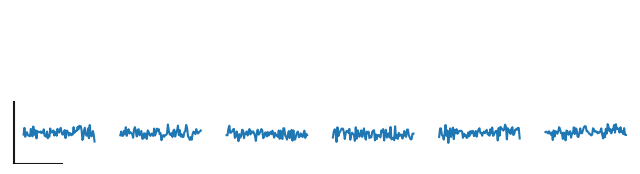

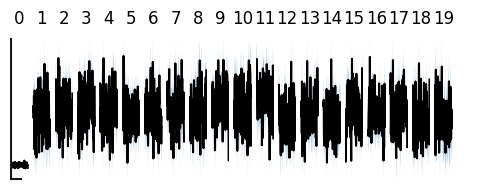

In [10]:
roi_name = 'M1'
sta.plotResponseByCondition(ID, roi_name=roi_name, condition='color')

sta.plotRoiResponses(ID, roi_name=roi_name)